In [ ]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

100%|██████████| 586M/586M [00:25<00:00, 24.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [4]:
path = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"
print(os.listdir(path))

['elefante', 'scoiattolo', 'farfalla', 'mucca', 'cavallo', 'cane', 'gatto', 'gallina', 'pecora', 'ragno']


In [ ]:
# translating and renaming folders with images
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant",
             "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
             "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider"}

for old_name, new_name in translate.items():
  old_path = os.path.join(path, old_name)
  new_path = os.path.join(path, new_name)
  if os.path.exists(old_path):
    os.rename(old_path, new_path)
print(os.listdir(path))

['cat', 'chicken', 'butterfly', 'horse', 'sheep', 'cow', 'spider', 'squirrel', 'dog', 'elephant']


{'cat': 1668, 'chicken': 3098, 'butterfly': 2112, 'horse': 2623, 'sheep': 1820, 'cow': 1866, 'spider': 4821, 'squirrel': 1862, 'dog': 4863, 'elephant': 1446}


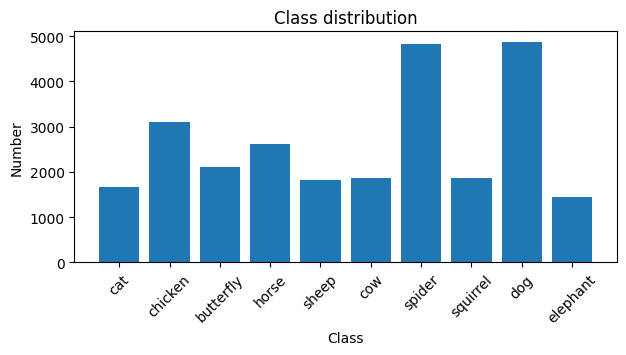

In [6]:
class_counts = {}
for cls in os.listdir(path):
  class_path = os.path.join(path, cls)
  class_counts[cls] = len(os.listdir(class_path))

print(class_counts)

plt.figure(figsize=(7, 3))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Number")
plt.title("Class distribution")
plt.show()

<Figure size 1500x1000 with 0 Axes>

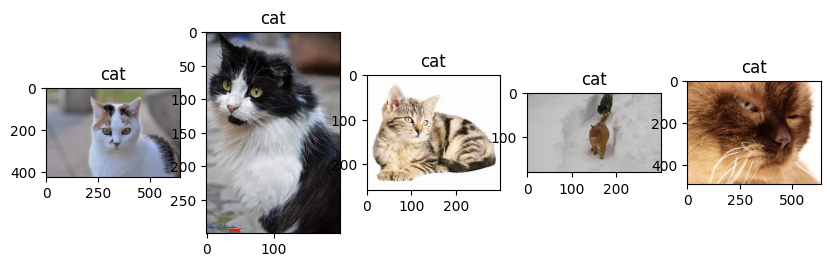

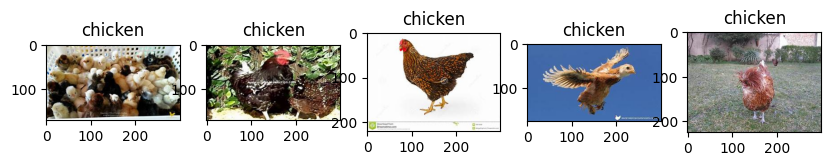

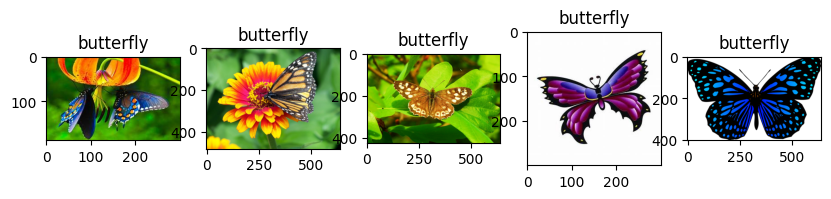

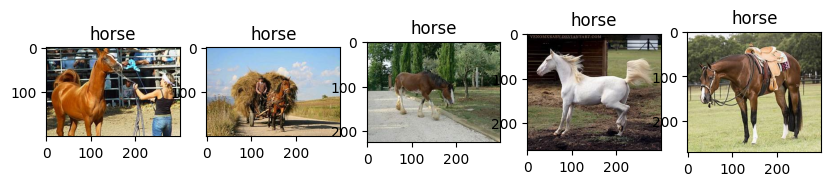

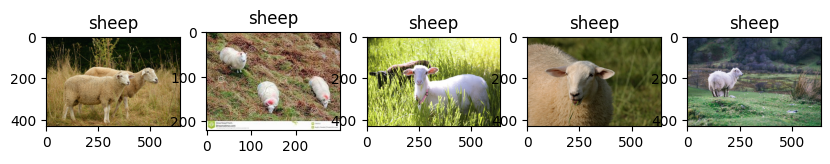

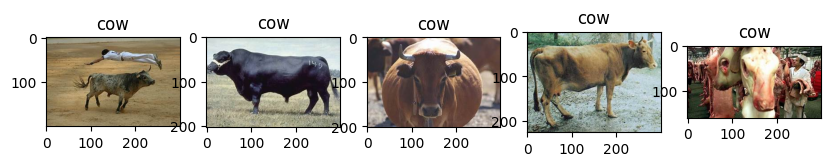

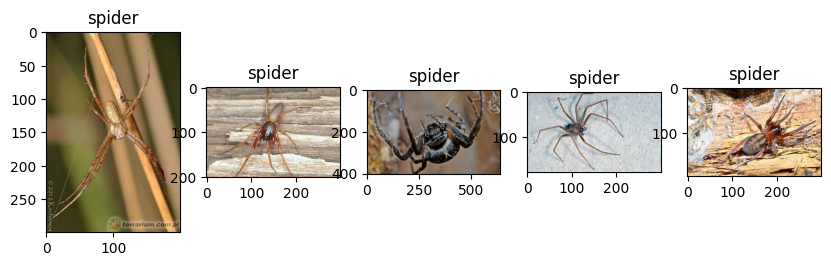

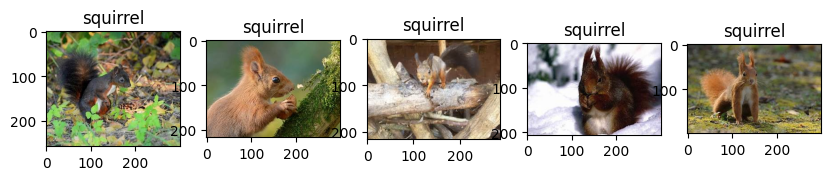

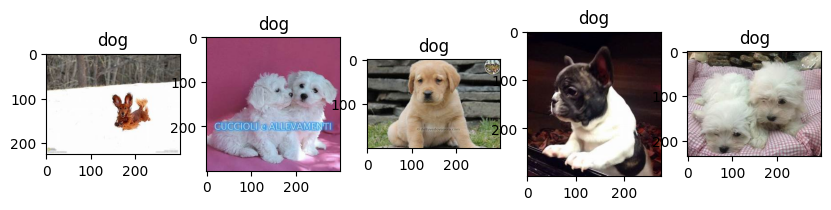

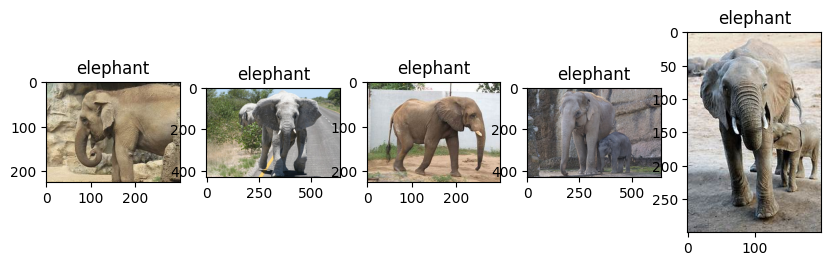

In [7]:
plt.figure(figsize=(15, 10))
for cls in os.listdir(path):
  cls_path = os.path.join(path, cls)
  cls_images = os.listdir(cls_path)
  random_images = random.sample(cls_images, 5)
  plt.figure(figsize=(10, 5))
  for i, img_file in enumerate(random_images):
    img_path = os.path.join(cls_path, img_file)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(cls)
plt.show()

In [ ]:
def resize_with_padding_pil(image, new_width, new_height):
    img_width, img_height = image.size
    aspect_ratio = img_width / img_height

    # determine the new image dimensions
    if aspect_ratio > 1:
        target_width = new_width
        target_height = int(new_width / aspect_ratio)
    else:
        target_height = new_height
        target_width = int(new_height * aspect_ratio)

    # resizing th image
    img_resized = image.resize((target_width, target_height), Image.LANCZOS)

    # creating an image with black borders if needed
    new_img = Image.new("RGB", (new_width, new_height), (0, 0, 0))
    offset = ((new_width - target_width) // 2, (new_height - target_height) // 2)
    new_img.paste(img_resized, offset)

    return new_img


output_path = "/task2/dataset"

os.makedirs(output_path, exist_ok=True)

for cls in os.listdir(path):
    cls_path = os.path.join(path, cls)
    output_cls_path = os.path.join(output_path, cls)
    os.makedirs(output_cls_path, exist_ok=True)

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        image = Image.open(img_path)

        resized_image = resize_with_padding_pil(image, 256, 256)

        # Зберігаємо зображення
        resized_image.save(os.path.join(output_cls_path, img_name))


<Figure size 1500x1000 with 0 Axes>

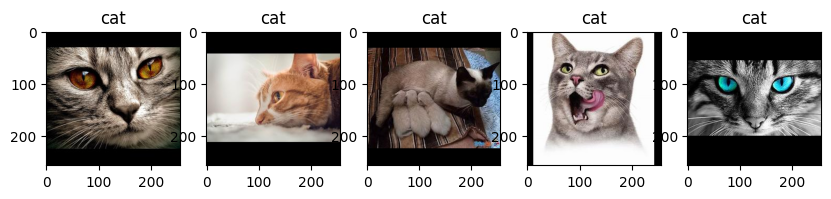

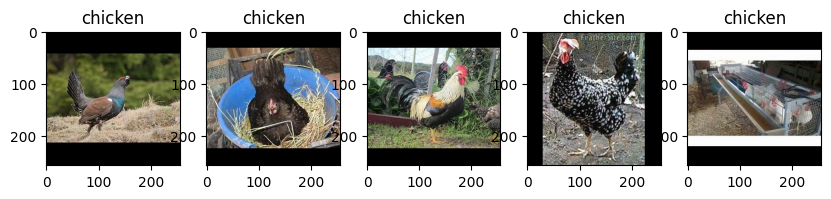

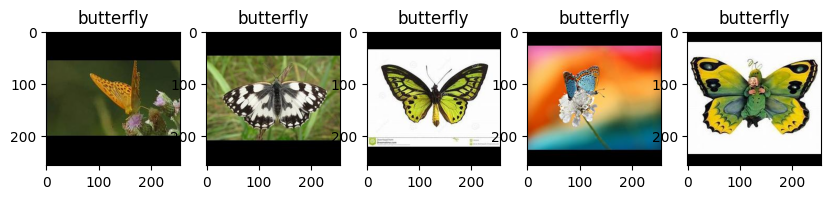

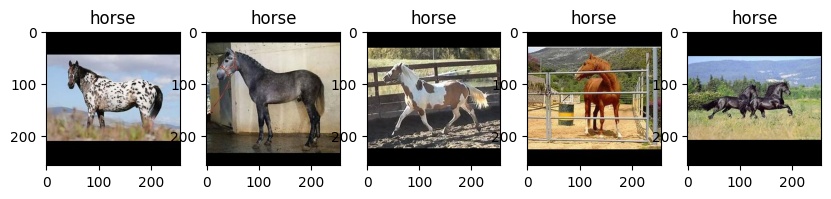

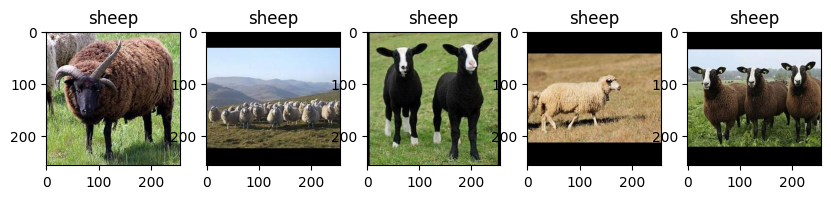

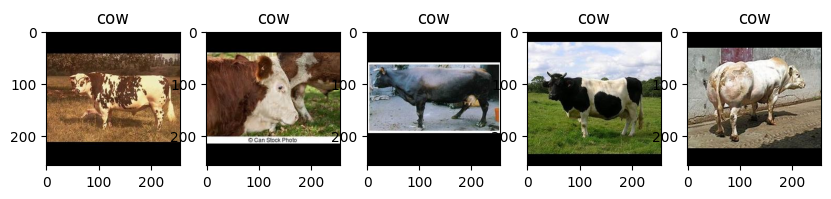

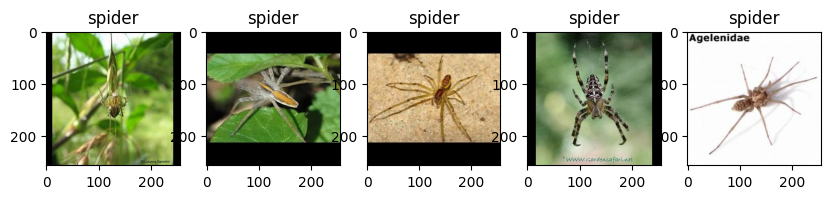

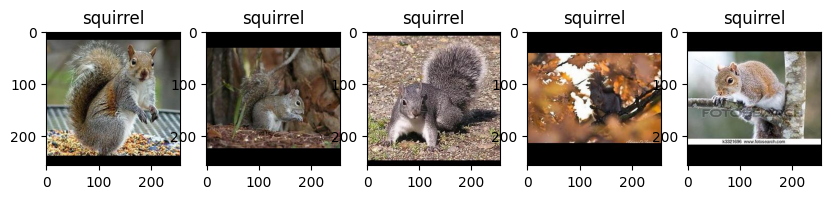

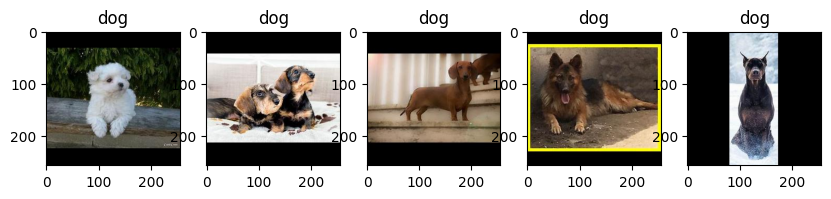

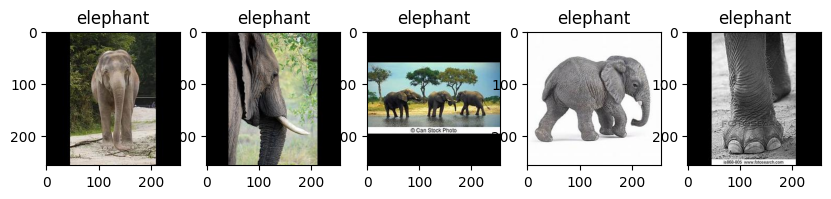

In [ ]:
for cls in os.listdir(output_path):
    cls_path = os.path.join(output_path, cls)
    cls_images = os.listdir(cls_path)
    random_images = random.sample(cls_images, 5)  

    plt.figure(figsize=(10, 5))
    for i, img_file in enumerate(random_images):
        img_path = os.path.join(cls_path, img_file)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(cls)
    plt.show()